<a href="https://colab.research.google.com/github/richirey75/Data-Mining-CS4990/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting my drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS4990GroupProject/CSV_files
!pwd

[Errno 2] No such file or directory: '/content/drive/MyDrive/CS4990GroupProject/CSV_files'
/content
/content


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tracks = pd.read_csv('Red Hot Chili Peppers_tracks_info.csv')

In [ ]:
tracks.head()

,album_name,album_id,release_date,total_tracks,track_name,track_id,duration_min,popularity,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Tippa My Tongue,7BCxIjRsqbc9Yiy2haBCIK,4.346800,NaN,0.573,0.913,...,0.1140,0.795,88.418,audio_features,7BCxIjRsqbc9Yiy2haBCIK,spotify:track:7BCxIjRsqbc9Yiy2haBCIK,https://api.spotify.com/v1/tracks/7BCxIjRsqbc9...,https://api.spotify.com/v1/audio-analysis/7BCx...,260810,4
1,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Peace and Love,3W2reBya7FkjHCP1B2nmQr,4.053733,NaN,0.680,0.679,...,0.0953,0.867,83.821,audio_features,3W2reBya7FkjHCP1B2nmQr,spotify:track:3W2reBya7FkjHCP1B2nmQr,https://api.spotify.com/v1/tracks/3W2reBya7Fkj...,https://api.spotify.com/v1/audio-analysis/3W2r...,243224,4
2,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Reach Out,00B7SBwrjbycLMOgAmeIU8,4.193133,NaN,0.663,0.710,...,0.1470,0.487,120.984,audio_features,00B7SBwrjbycLMOgAmeIU8,spotify:track:00B7SBwrjbycLMOgAmeIU8,https://api.spotify.com/v1/tracks/00B7SBwrjbyc...,https://api.spotify.com/v1/audio-analysis/00B7...,251589,4
3,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Eddie,0G1BEi8ByngMCJqcPnDACw,5.699767,NaN,0.515,0.809,...,0.0905,0.525,142.011,audio_features,0G1BEi8ByngMCJqcPnDACw,spotify:track:0G1BEi8ByngMCJqcPnDACw,https://api.spotify.com/v1/tracks/0G1BEi8ByngM...,https://api.spotify.com/v1/audio-analysis/0G1B...,341986,4
4,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Fake as Fu@k,7cpC2EuFMexgy392K13RZb,4.372883,NaN,0.599,0.777,...,0.0936,0.401,132.252,audio_features,7cpC2EuFMexgy392K13RZb,spotify:track:7cpC2EuFMexgy392K13RZb,https://api.spotify.com/v1/tracks/7cpC2EuFMexg...,https://api.spotify.com/v1/audio-analysis/7cpC...,262373,4


In [ ]:
features = ['danceability', 'energy', 'valence']


In [ ]:
tracks[features]

,danceability,energy,valence
0,0.573,0.913,0.795
1,0.680,0.679,0.867
2,0.663,0.710,0.487
3,0.515,0.809,0.525
4,0.599,0.777,0.401
...,...,...,...
282,0.565,0.907,0.599
283,0.477,0.935,0.673
284,0.587,0.963,0.729
285,0.670,0.821,0.707


In [ ]:
tracks[['danceability', 'energy', 'valence']].isna().any()

,0
danceability,False
energy,False
valence,False


In [ ]:
data = tracks[features].copy()
data

,danceability,energy,valence
0,0.573,0.913,0.795
1,0.680,0.679,0.867
2,0.663,0.710,0.487
3,0.515,0.809,0.525
4,0.599,0.777,0.401
...,...,...,...
282,0.565,0.907,0.599
283,0.477,0.935,0.673
284,0.587,0.963,0.729
285,0.670,0.821,0.707


In [ ]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()

,danceability,energy,valence
count,287.000000,287.000000,287.000000
mean,6.782859,8.803425,6.209876
std,1.454737,2.133890,2.376147
min,1.000000,1.000000,1.000000
25%,5.877529,7.854566,4.340249
50%,6.963791,9.545660,6.051867
75%,7.751864,10.447576,8.318465
max,11.000000,11.000000,11.000000


In [ ]:
# this picks a random point from each column
def random_centroids(data, k):
  centroids = []
  for col in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 3)
centroids

<ipython-input-84-d432c519150c>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
danceability,7.560170,4.982961,6.899894
energy,9.060879,10.797069,3.660654
valence,8.323651,7.628631,4.547718


In [ ]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x)** 2).sum(axis=1)))
  return distances.idxmin(axis=1)


In [ ]:
labels = get_labels(data, centroids)
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
282,0
283,1
284,0
285,0


In [ ]:
labels.value_counts()

,count
0,134
1,107
2,46


In [ ]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

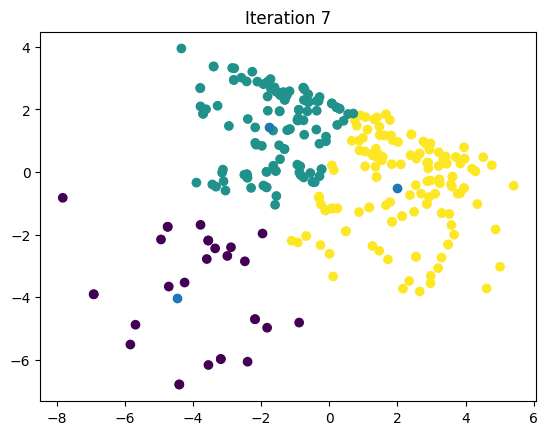

In [ ]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1,2
danceability,5.797505,5.964946,7.403074
energy,3.442617,9.531953,9.028102
valence,3.654485,4.199894,8.160650


In [ ]:
labels.value_counts()

,count
2,138
1,120
0,29


In [ ]:
tracks[labels == 0][["track_name" ] + features]

,track_name,danceability,energy,valence
13,La La La La La La La La,0.426,0.217,0.1790
16,In the Snow,0.701,0.347,0.4430
20,Not the One,0.597,0.472,0.2330
30,Veronica,0.483,0.575,0.4100
33,Tangelo,0.507,0.177,0.4010
37,The Longest Wave,0.476,0.511,0.3390
45,The Hunter,0.256,0.523,0.3180
67,Slow Cheetah,0.390,0.344,0.2440
77,Hard to Concentrate,0.641,0.502,0.3260
81,If,0.340,0.150,0.2240


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
danceability,6.181366,6.420015,7.531800
energy,9.587681,4.181647,9.205038
valence,4.545926,4.225009,8.547106


In [ ]:
centroids

,0,1,2
danceability,5.797505,5.964946,7.403074
energy,3.442617,9.531953,9.028102
valence,3.654485,4.199894,8.160650
